# **Assignment 6 : Perform Computer Vision Techniques**

# Object Detection
**Definition:** Identifies objects in an image and draws bounding boxes around them.

In [ ]:
# Install necessary libraries
!pip install opencv-python matplotlib torch torchvision transformers ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.4/898.4 kB 16.8 MB/s eta 0:00:00


**Importing libraries needed for file handling, image processing, and visualization.**

In [ ]:
# Import necessary libraries
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import io
import cv2
import numpy as np
import torch

In [ ]:
# Upload the image file
uploaded = files.upload()

Saving man.jpg to man.jpg


In [ ]:
# Assuming the user uploads a single image, extract the filename
image_filename = list(uploaded.keys())[0]

In [ ]:
# Read the image using OpenCV
image = cv2.imread(image_filename, cv2.IMREAD_COLOR)

In [ ]:
# Convert the image from BGR to RGB for proper display in matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

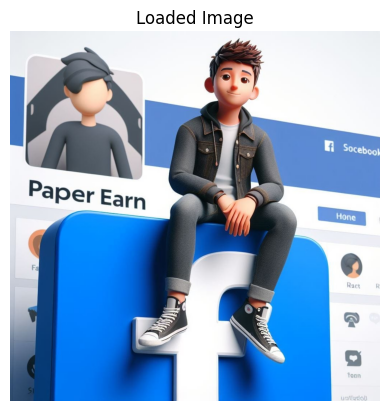

In [ ]:
# Display the original image
plt.imshow(image_rgb)
plt.title("Loaded Image")
plt.axis("off")
plt.show()

**The image is being resized to a 224x224 dimension.**

In [ ]:
# Resize the image
resized_image = cv2.resize(image_rgb, (224, 224))

**The image is being converted from the RGB color space to grayscale, removing color information and retaining only intensity.**

In [ ]:
# Convert to grayscale
grayscale_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

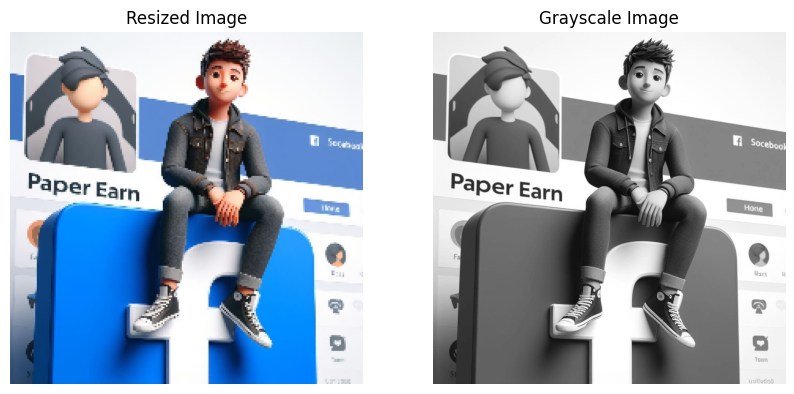

In [ ]:
# Display preprocessed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(resized_image)
plt.title("Resized Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(grayscale_image, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

**Performing on the grayscale image using the Canny algorithm, with threshold values set to 100 and 200 to identify strong edges.**

In [ ]:
# Perform edge detection
edges = cv2.Canny(grayscale_image, threshold1=100, threshold2=200)

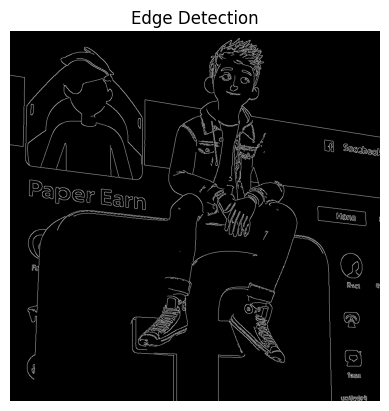

In [ ]:
# Display the edges
plt.imshow(edges, cmap="gray")
plt.title("Edge Detection")
plt.axis("off")
plt.show()

In [ ]:
# Upload the image to Colab
uploaded = files.upload()

Saving car.png to car.png


In [ ]:
# Get the image path from the uploaded files
for filename in uploaded.keys():
    image_path = filename

**Loading the `YOLOv5` model using pretrained weights from the Ultralytics repository, specifically the `yolov5s` version.**

In [ ]:
# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

/usr/local/lib/python3.10/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2024-12-3 Python-3.10.12 torch-2.5.1+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 170MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
# Perform inference on the uploaded image
results = model(image_path)

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [ ]:
# Display the results (with bounding boxes drawn around detected objects)
results.show()

Output hidden; open in https://colab.research.google.com to view.

# **Image Segmentation**

**Definition:** Segmentation partitions an image into regions or objects.

**Importing necessary libraries: Torch for machine learning, Matplotlib for plotting, and Google Colab's files module for handling file uploads.**

In [ ]:
!wget https://path_to_your_model/yolov8n-seg.pt

--2024-12-06 03:31:47--  https://path_to_your_model/yolov8n-seg.pt
Resolving path_to_your_model (path_to_your_model)... failed: Name or service not known.
wget: unable to resolve host address ‘path_to_your_model’


In [ ]:
from ultralytics import YOLO

In [ ]:
# Upload the image file
uploaded = files.upload()

Saving man.jpg to man (1).jpg


In [ ]:
# Assuming the user uploads a single image
image_filename = list(uploaded.keys())[0]

**Loading `YOLOv8-seg` model from the specified weights file (`yolov8n-seg.pt`) using the YOLO class for segmentation tasks.**

In [ ]:
# Load YOLOv8-seg model
model = YOLO('yolov8n-seg.pt')

In [ ]:
# Perform inference on the uploaded image using YOLOv8
results = model.predict(source=image_filename)


image 1/1 /content/man (1).jpg: 640x640 2 persons, 351.3ms
Speed: 8.3ms preprocess, 351.3ms inference, 10.3ms postprocess per image at shape (1, 3, 640, 640)


**The results object contains the processed image with segmentation overlays.**

In [ ]:
# Extract the resultant image with segmentation overlays
result_image = results[0].plot()

In [ ]:
# Convert the result image from BGR to RGB for proper display
result_image_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)

In [ ]:
# Display the segmentation result using Pillow
Image.fromarray(result_image_rgb).show()

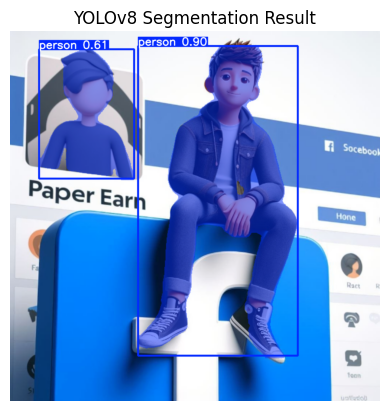

In [ ]:
# Display the segmentation result with matplotlib
plt.imshow(result_image_rgb)
plt.title("YOLOv8 Segmentation Result")
plt.axis("off")

plt.show()